# Main Figures

**Paper: Countering Local Overfitting for Equitable Spatiotemporal Modeling**

*Zhehao Liang, Stefano Castruccio, Paola Crippa*

This notebook generates Figures 1-5 for the main text.



## Required Data Files

```
data/
├── training/
│   └── Site_Observation_with_feature.pkl    # Station observations with features
├── ozone.nc                                  # Ozone gridded data
├── ne_10m_land.shp                          # Map boundaries (Natural Earth)
├── appendix/
│   ├── represent_10CV_100k/                 # Fig 1: 10-fold CV results
│   ├── 5CV_validation_vs_parameter/         # Fig 2/4: Parameter analysis
│   ├── 5-Fold-Epoch/                        # Fig 2: Epoch analysis, the same with /epoch_analysis/  
│   ├── 5-Fold-nn_grid/epoch_analysis/       # Fig 4: OG epoch analysis
│   ├── 10-Fold/                             # Fig 3: OG ensemble results
│   └── geo_prediction/
│       ├── lightgbm.nc                      # Fig 2c: Spatial predictions
│       └── mlp_og.nc                        # Fig 4c: OG predictions
└── Analysis/
    ├── validation/
    │   ├── df_analysis.pkl                  # Fig 5: Analysis data
    │   ├── df_analysis_Station.pkl
    │   └── df_analysis_Grid.pkl
    └── Figure1_Region_based/*.csv           # Fig 5: Region-based results
```


In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import xarray as xr
import geopandas as gpd

# Local utilities
import sys
sys.path.append('.')

# Import figure modules explicitly
from source_code.styles import setup_figure_style, MODEL_COLORS, VALIDATION_COLORS
from source_code.figure1 import (
    plot_station_distribution,
    plot_density_comparison,
    plot_validation_comparison,
    plot_density_vs_r2
)
from source_code.figure2 import (
    plot_figure2,
    plot_global_and_regions
)
from source_code.figure3 import (
    plot_og_ablation,
    load_og_results
)
from source_code.figure4 import (
    figure4_capacity_13,
    figure4_parameter13,
    figure4_capacity
)
from source_code.figure5 import (
    plot_accuracy_sparsity_map,
    calculate_sparsity_map,
    make_mask
)
%load_ext autoreload
%autoreload 2

# Setup figure style
#setup_figure_style()

# Define paths
DATA_DIR = "data"
FIGURE_DIR = "Figure"

# Ensure output directory exists
os.makedirs(FIGURE_DIR, exist_ok=True)
print(f"✓ Figures will be saved to: {FIGURE_DIR}/")


✓ Figures will be saved to: Figure/


## Figure 1: Data Overview

### Subplots:
| Panel | Description | Function | Data Source |
|-------|-------------|----------|-------------|
| **(a)** | Spatial distribution of TOAR stations | Custom map plot | `Site_Observation_with_feature.pkl`, `ne_10m_land.shp` |
| **(b)** | Density distribution (observed vs grid) | Histogram | `Site_Observation_with_feature.pkl`, `ozone.nc` |
| **(c) main** | R² across CV strategies (2 models × 4 CVs) | `plot_represent_two_models()` | `represent_10CV_100k/` |
| **(c) inset** | Density vs R² relationship | `plot_represent_two_density()` | `represent_10CV_100k/` |


Calculating sparsity map...


Calculating weighted data density (haversine):   0%|          | 0/277400 [00:00<?, ?it/s]

🕐 Starting plot generation...
🏁 Total time: 4.19s
✓ Figure saved to: Figure/figure1a_station_distribution.svg


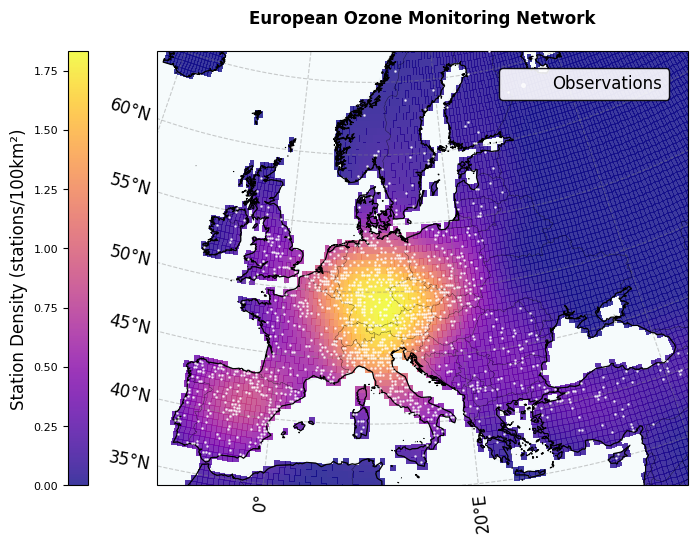

In [3]:
# ============================================================
# Figure 1a: Station Spatial Distribution
# ============================================================
# Output: Figure/figure1a_station_distribution.svg

fig, ax, cax = plot_station_distribution(
    projection='LambertConformal',
    central_longitude=10.0,
    central_latitude=50.0,
    figsize=(8, 6),
    station_size=0.8,
    raster_factor=2,
    boundary_simplify=0.05,
    title='European Ozone Monitoring Network',
    extent=[-10, 40, 35, 65],
    layout='horizontal',
    horizontal_colorbar_tick_size=8,
    horizontal_other_font_size=12,
    horizontal_colorbar_width=0.76,
    show_progress=True,
    save_path=f"{FIGURE_DIR}/figure1a_station_distribution.svg"
)
plt.show()


Calculating station density (radius=500km)...


Calculating weighted data density (haversine):   0%|          | 0/1315 [00:00<?, ?it/s]

Calculating sparsity map...


Calculating weighted data density (haversine):   0%|          | 0/277400 [00:00<?, ?it/s]

✓ Figure saved to: Figure/figure1b_density_comparison.svg


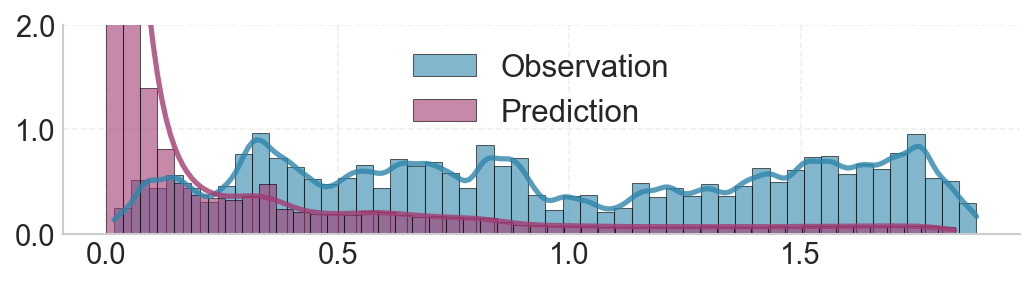

In [12]:
# ============================================================
# Figure 1b: Density Distribution Comparison
# ============================================================
# Output: Figure/figure1b_density_comparison.svg

fig, ax = plot_density_comparison(
    bins=50,
    kde=True,
    scale_factor=10000,
    title='Observed vs Under Prediction',
    labels=('Observation', 'Prediction'),
    x_lim_number=6,
    y_lim_number=3,
    show_title=False,
    show_x_label=False,
    show_y_label=False,
    figsize=(7, 2),
    font_size=16,
    y_lim=(0, 2),
    radius=500,
    save_path=f"{FIGURE_DIR}/figure1b_density_comparison.svg"
)
plt.show()


✓ Figure saved to: Figure/figure1c_main.svg


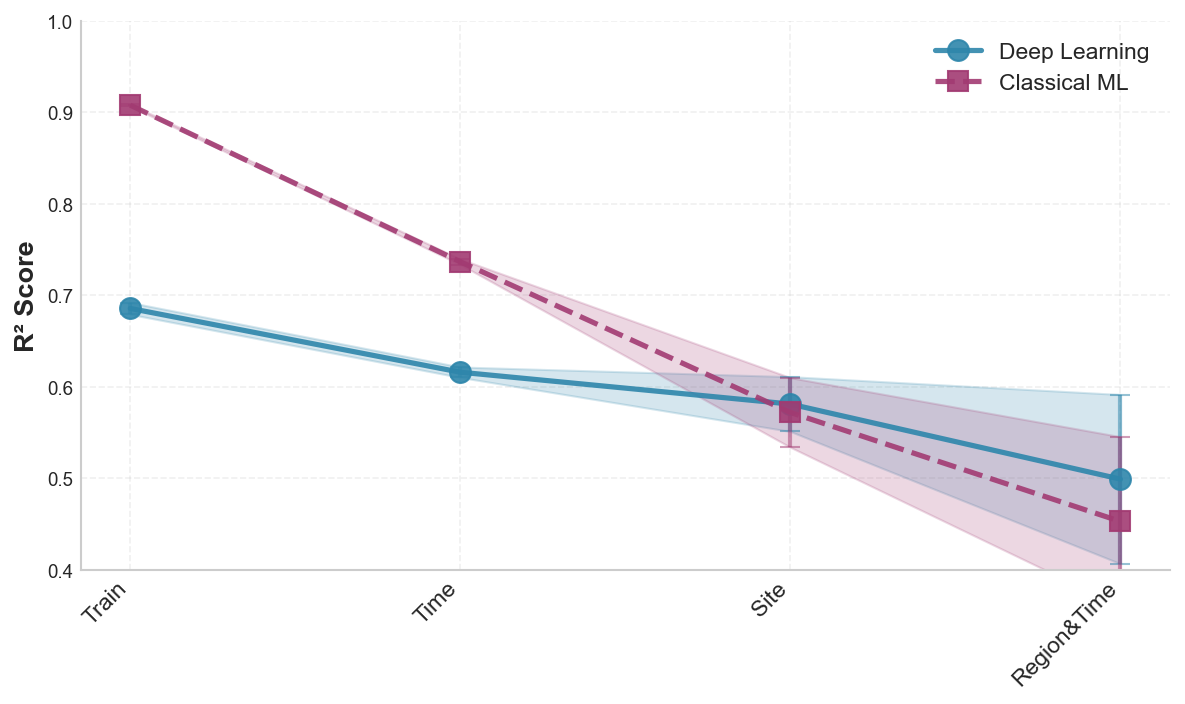

In [13]:
# ============================================================
# Figure 1c (main): Validation Results Comparison
# ============================================================
# Output: Figure/figure1c_main.svg

fig, ax = plot_validation_comparison(
    project_path=f"{DATA_DIR}/appendix/represent_10CV_100k",
    model1="mlp_early", 
    model2="lightgbm",
    uncertainty=True,
    y_lim=(0.40, 1),
    name=("Deep Learning", "Classical ML"),
    strategies=["train", "Sample", "Site", "Spatiotemporal_block"],
    figsize=(8, 4.8),
    save_path=f"{FIGURE_DIR}/figure1c_main.svg",
)
plt.show()


Calculating global data sparsity (radius: 500km)...


Calculating weighted data density (haversine):   0%|          | 0/1315 [00:00<?, ?it/s]

✓ Global sparsity calculation complete.

Processing train - 10 folds...

Processing Sample - 10 folds...

Processing Site - 10 folds...

Processing Grid - 10 folds...

Processing Spatiotemporal_block - 10 folds...
✓ Figure saved to: Figure/figure1c_inset.svg


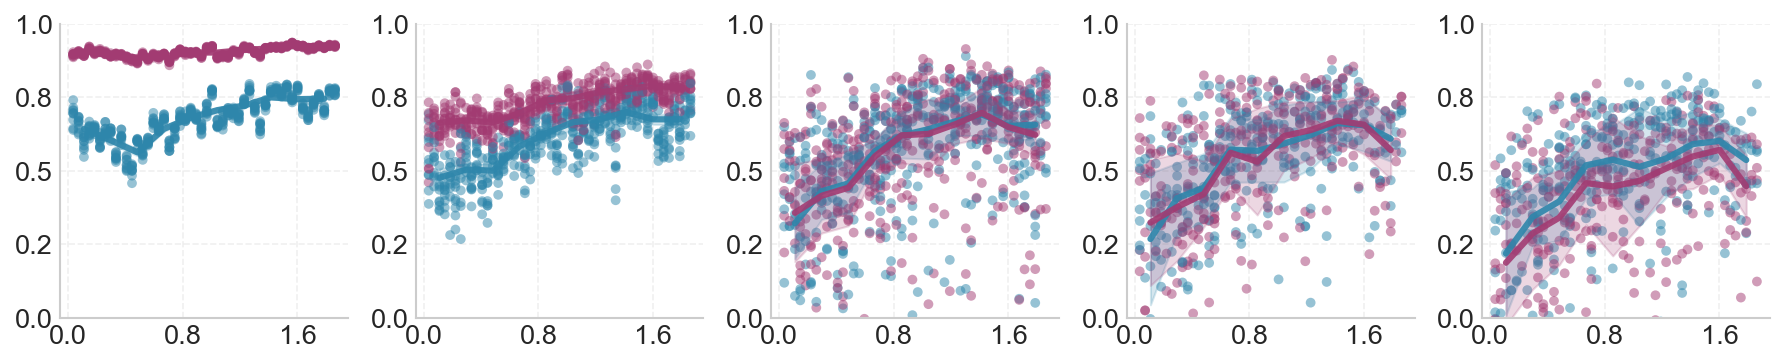

In [14]:
# ============================================================
# Figure 1c (inset): Density vs R² Relationship
# ============================================================
# Output: Figure/figure1c_inset.svg

# Load station data for density calculation
df = pkl.load(open(f'{DATA_DIR}/training/Site_Observation_with_feature.pkl', 'rb'))
df["time"] = pd.to_datetime(df["time"])
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col] = df[col].astype("float32")

fig, axes = plot_density_vs_r2(
    project_path=f"{DATA_DIR}/appendix/represent_10CV_100k",
    df=df,
    model1="mlp_early",
    model2="lightgbm",
    radius=500,
    name=("Neural Network", "Tree-based Model"),
    sample_size=100000,
    uncertainty=True,
    global_reference=True,
    strategies=['train', 'Sample', 'Site', 'Grid', 'Spatiotemporal_block'],
    n_bins=10,
    visual_point_bin=50,
    show_title=False,
    legend=False,
    x_label=False,
    y_label=False,
    figsize=(12, 2.53),
    font_size=15,
    x_lim_number=4,
    y_lim_number=5,
    save_path=f"{FIGURE_DIR}/figure1c_inset.svg"
)
plt.show()


## Figure 2: Local Overfitting

### Subplots:
| Panel | Description | Function | Data Source |
|-------|-------------|----------|-------------|
| **(a)** | Model complexity (params) vs R² | `plot_figure2()` | `5CV_validation_vs_parameter/` |
| **(b)** | Training epochs vs R² | `plot_figure2()` | `5-Fold-Epoch/` |
| **(c) global** | Spatial ozone prediction (2019 heatwave) | `plot_global_and_regions()` | `geo_prediction/lightgbm.nc` |
| **(c) A-D** | 4 test regions with R² values | `plot_global_and_regions()` | Same + train/test indices |


d:\OneDrive\Code\Ozone_Reconstruction\Submission_Code\local_overfit\source_code\figure2.py:385: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


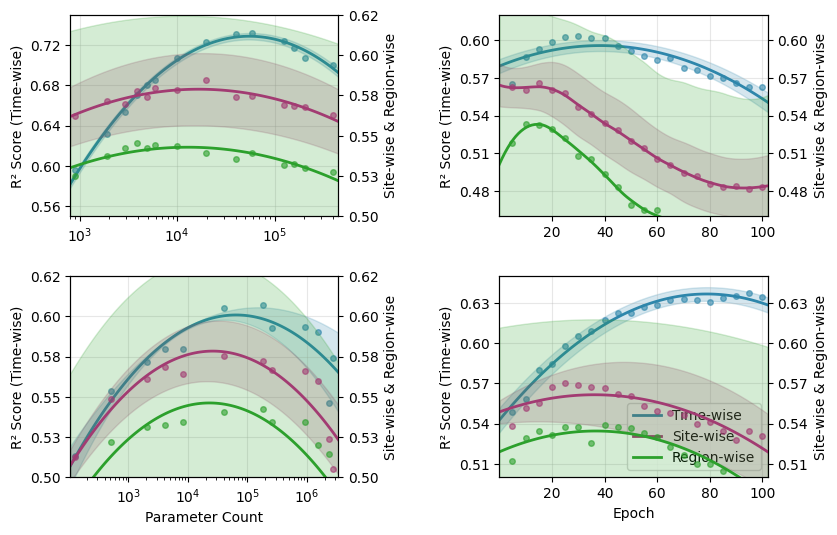

In [2]:
# ============================================================
# Figure 2a-b: Complexity and Epochs vs R²
# ============================================================
# Output: Figure/figure2_1.svg
# Original call from 4. All_Figures.ipynb

from source_code.figure2 import plot_figure2

fig, axes = plot_figure2(
    param_project_path=f"{DATA_DIR}/appendix/5CV_validation_vs_parameter",
    epoch_project_path=f"{DATA_DIR}/appendix/5-Fold-Epoch",
    figsize=(9, 6),
    config=2,
    #save_path=f"{FIGURE_DIR}/figure2_1.svg"
)
plt.show()


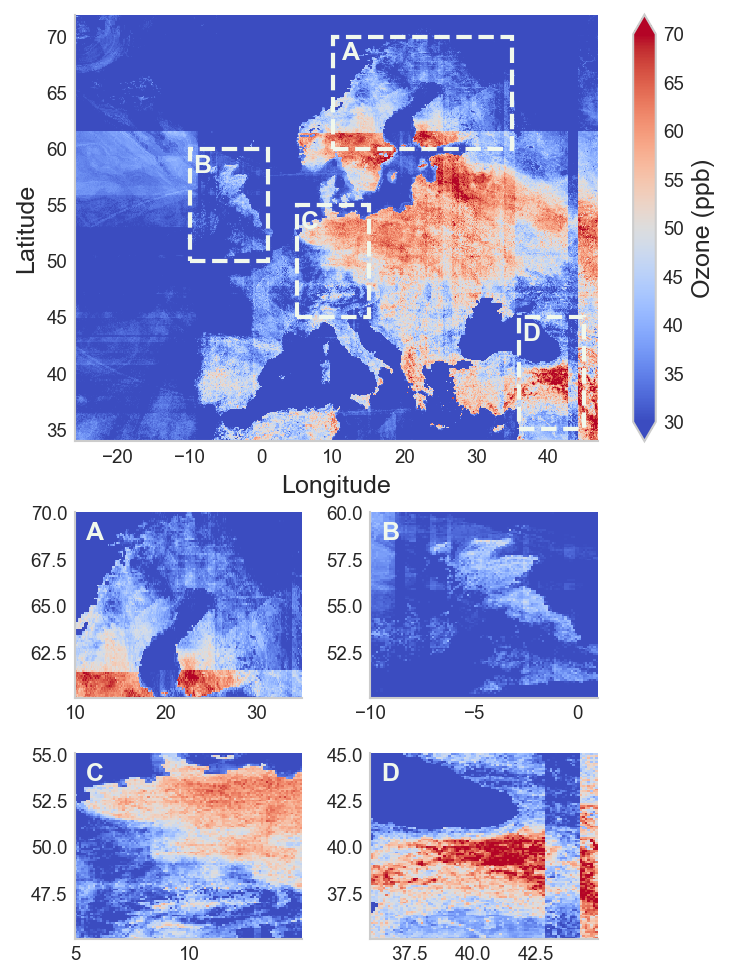

In [33]:
# ============================================================
# Figure 2c: Spatial Prediction with Regional R²
# ============================================================
# Output: Figure/figure2c_spatial_prediction.svg
# Original call from 4. All_Figures.ipynb

from source_code.figure2 import plot_global_and_regions

# Load prediction data
ds_visual_ml = xr.open_dataset(f"{DATA_DIR}/appendix/geo_prediction/lightgbm.nc")

# Define test regions: [lat_min, lon_min, lat_max, lon_max]
regions = [
    [60, 10, 70, 35],
    [50, -10, 60, 1],
    [45, 5, 55, 15],
    [35, 36, 45, 45]
]

# Note: For R2 calculation, need df with 'Ozone' and 'predicted' columns, plus train_ind and test_ind
# R2_information = [df, train_ind, test_ind]  # Uncomment when data available

fig, axes = plot_global_and_regions(
    ds=ds_visual_ml,
    regions=regions,
    cmap='coolwarm',
    vmin=30,
    vmax=70,
    variable='o3_ml',
    figsize=(5, 8),
    # R2_information=[df, train_ind, test_ind],  # Uncomment when data available
    main_title_font=12,
    sub_title_font=12,
    text_color='#F1F8EC',
    box_color='#F1F8EC',
    #save_path=f"{FIGURE_DIR}/figure2c_spatial_prediction.svg"
)
plt.show()


## Figure 3: OG Ensemble Approach

### Structure: 3×3 Grid
| | **Transformer** | **MLP** | **ResNet** |
|---|---|---|---|
| **LightGBM** | OG combo | OG combo | OG combo |
| **CatBoost** | OG combo | OG combo | OG combo |
| **XGBoost** | OG combo | OG combo | OG combo |

### Axes:
- **x-axis**: Site-wise CV R²
- **y-axis**: Region-wise CV R²
- **color**: Spatiotemporal-wise CV R²

| Function | Data Source |
|----------|-------------|
| `plot_og_ablation()` | `10-Fold/` |


✓ Loaded color metric: Spatiotemporal_block
✓ Loaded results for 31 models
  Available models: ['bigcatboost', 'biglightgbm', 'bigxgboost', 'catboost', 'lightgbm']...
✓ Using non-uniform color scale with 8 boundaries
  Range: 0.450 - 0.520


d:\OneDrive\Code\Ozone_Reconstruction\Submission_Code\local_overfit\source_code\figure3.py:606: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


✓ Figure saved to: Figure/figure3.svg


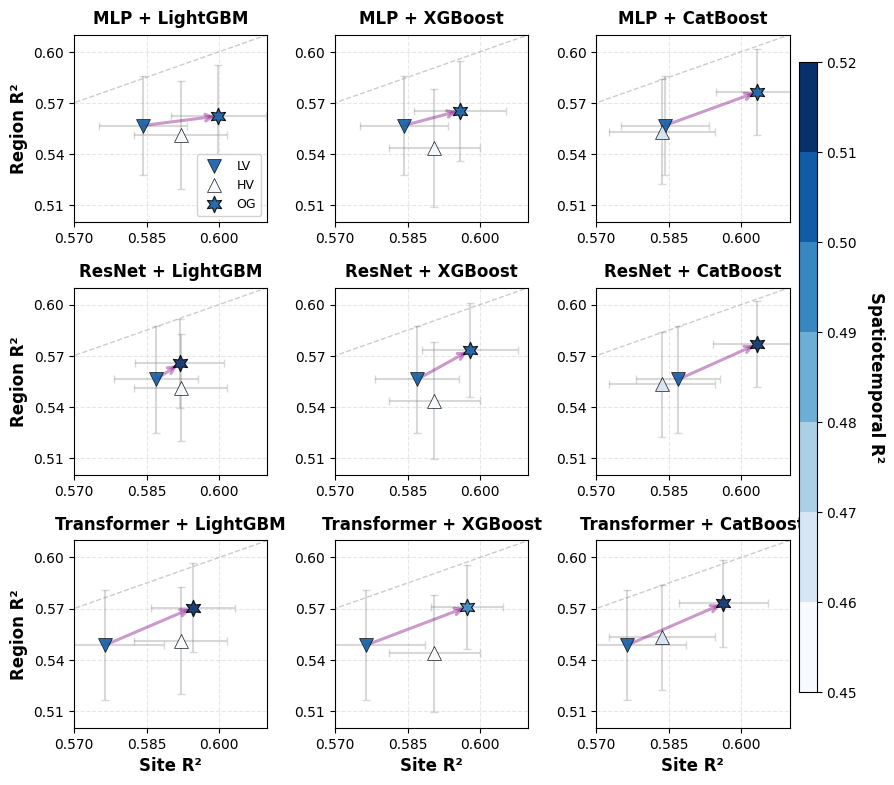

In [7]:
# ============================================================
# Figure 3: OG Ablation Study (3×3 Grid)
# ============================================================
# Compare DL models (MLP, ResNet, Transformer) × ML models (LightGBM, XGBoost, CatBoost)
# Original call from 4. All_Figures.ipynb

from source_code.figure3 import plot_og_ablation
from matplotlib.colors import LinearSegmentedColormap

# 创建自定义渐变
custom_cmap = LinearSegmentedColormap.from_list(
    'custom', ['grey', 'lightblue']
)

# 输入参数 (exactly as in original 4. All_Figures.ipynb)
project_path = f"{DATA_DIR}/appendix/10-Fold"
dl_group = ['mlp', 'resnet', 'transformer']
ml_group = ['biglightgbm', 'bigxgboost', 'bigcatboost']
metrics = ["Site", "Grid"]

# 绘制主图（3列子图，每列一个DL模型）
fig, axes = plot_og_ablation(
    project_path=project_path,
    dl_group=dl_group,
    ml_group=ml_group,
    metrics=metrics,
    early_stop=True,
    x_lim=[0.57, 0.61],
    y_lim=[0.5, 0.61],
    x_locator=3, 
    y_locator=4, 
    figsize=(9, 9),
    color_metric="Spatiotemporal_block",
    color_boundaries=[0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.510, 0.520],
    bold=True,
    save_path=f"{FIGURE_DIR}/figure3.svg"
)
plt.show()


## Figure 4: OG Mitigation of Local Overfitting

### Subplots:
| Panel | Description | Function | Data Source |
|-------|-------------|----------|-------------|
| **(a)** | OG parameter count vs R² (3 models) | `figure4_parameter13()` | `5CV_validation_vs_parameter/` |
| **(b)** | OG training epochs vs R² (3 models) | `figure4_capacity_13()` | `5-Fold-nn_grid/epoch_analysis/` |
| **(c) global** | OG spatial ozone prediction | `plot_global_and_regions()` | `geo_prediction/mlp_og.nc` |
| **(c) A-D** | 4 test regions with R² improvement | `plot_global_and_regions()` | Same + comparison table |


✓ Figure 4a saved to: Figure/figure4a_og_parameter.svg


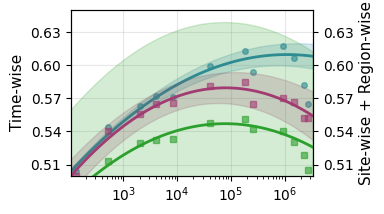

In [17]:
# ============================================================
# Figure 4a: OG-MLP Parameter Complexity
# ============================================================

from source_code.figure4 import plot_figure4a

fig, ax = plot_figure4a(
    param_project_path=f"{DATA_DIR}/appendix/5CV_validation_vs_parameter",
    figsize=(4., 2.3),  # 1/3 of original 13.5
    sample_size='full',
    use_folds=[1, 2, 3, 4, 5],
    exclude_point_idx=[-2, -1],
    y_lim=((0.5, 0.65), (0.5, 0.65)),
    max_locator=(6, 6),
    save_path=f"{FIGURE_DIR}/figure4a_og_parameter.svg"
)
plt.show()


✓ Figure 4b saved to: Figure/figure4b_og_epochs.svg


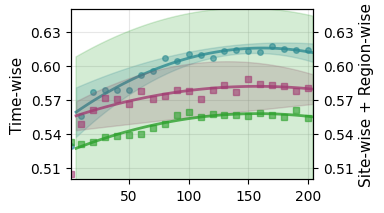

In [18]:
# ============================================================
# Figure 4b: OG-MLP Training Epochs
# ============================================================

from source_code.figure4 import plot_figure4b

fig, ax = plot_figure4b(
    epoch_project_path=f"{DATA_DIR}/appendix/5-Fold-nn_grid/epoch_analysis",
    figsize=(4., 2.3),  # 1/3 of original 13.5
    config=2,  # With confidence bands
    reduce_points=True,
    left_y_lim=(0.5, 0.65),
    right_y_lim=(0.5, 0.65),
    save_path=f"{FIGURE_DIR}/figure4b_og_epochs.svg"
)
plt.show()


✓ Figure saved to: Figure/figure4c_og_spatial.svg


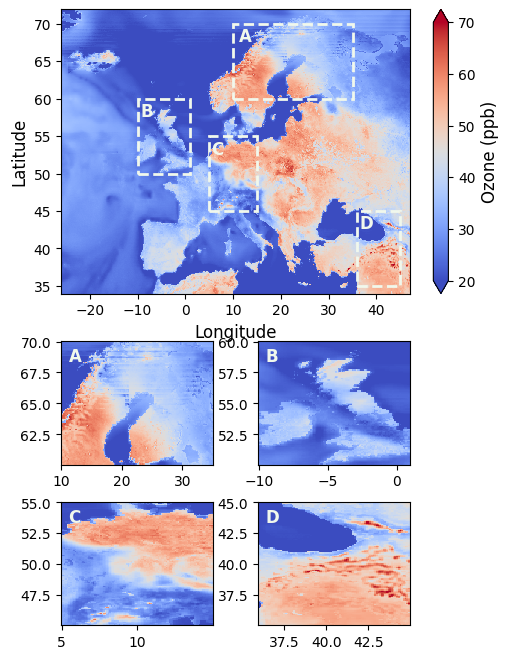

The result of R2 need package og-learn


In [20]:

regions = [
    [60, 10, 70, 35],
    [50, -10, 60, 1],
    [45, 5, 55, 15],
    [35, 36, 45, 45]
]

# Plot OG model prediction:
ds_og = xr.open_dataset(f"{DATA_DIR}/appendix/geo_prediction/mlp_og.nc")

fig, axes = plot_global_and_regions(
    ds=ds_og,
    regions=regions,
    cmap='coolwarm',
    vmin=20,
    vmax=70,
    variable='o3_ml',
    figsize=(5, 8),
    R2_information=None,  # Requires df with 'predicted' column from model
    main_title_font=12,
    sub_title_font=12,
    text_color='#F1F8EC',
    box_color='#F1F8EC',
    save_path=f"{FIGURE_DIR}/figure4c_og_spatial.svg"
)
plt.show()
ds_og.close()

print("The result of R2 need package og-learn")


## Figure 5: Spatial Equity Assessment

### Subplots:
| Panel | Description | Function | Data Source |
|-------|-------------|----------|-------------|
| **(a)** | High data (1M): R² by density quartiles | `calculate_quartile_r2()` | `df_analysis.pkl` |
| **(b)** | High data (1M): Predicted R² surface | `plot_accuracy_sparsity_map()` | `df_analysis.pkl` + `ozone.nc` |
| **(c)** | Low data (10k): R² by density quartiles | `calculate_quartile_r2()` | `df_analysis.pkl` |
| **(d)** | Low data (10k): Predicted R² surface | `plot_accuracy_sparsity_map()` | `df_analysis.pkl` + `ozone.nc` |
| **(e)** | Accuracy matrix heatmap (GAM) | `plot_heatmap_comparison()` | `Figure1_Region_based/*.csv` |

### Density Quartiles:
- Q0: High density (1.0e-04 - 1.4e-04)
- Q1: Medium-high (7.0e-05 - 1.0e-04)
- Q2: Medium-low (4.0e-05 - 7.0e-05)
- Q3: Low density (< 4.0e-05)


Calculating weighted density (haversine):   0%|          | 0/277400 [00:00<?, ?it/s]

Using average_30x30 mode
Figure saved to: Figure/figure5_average_30x30_10000.svg


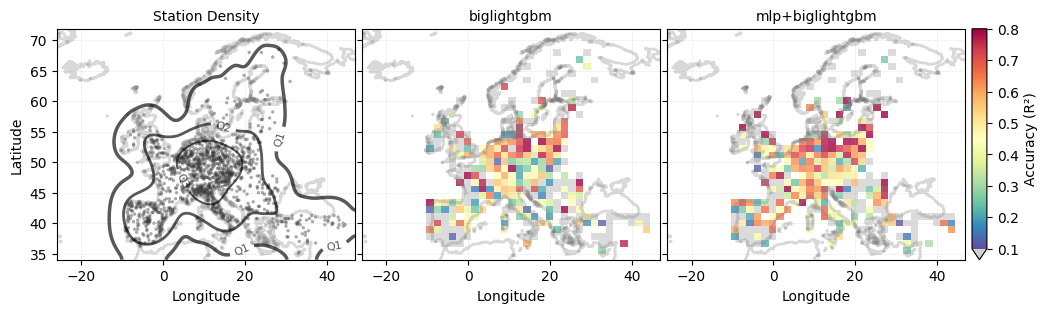

Figure saved to: Figure/figure5_two_stage_10000.svg


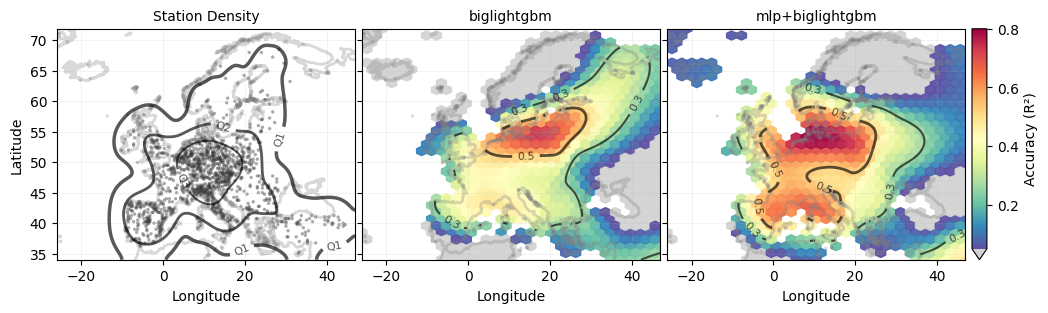

Using average_30x30 mode
Figure saved to: Figure/figure5_average_30x30_1000000.svg


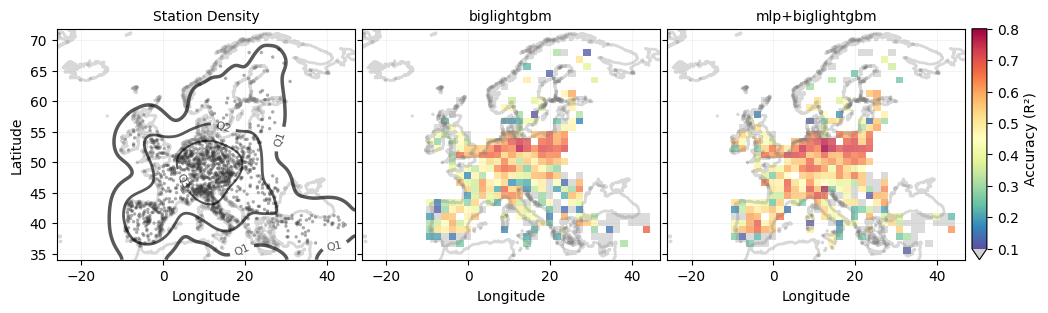

Figure saved to: Figure/figure5_two_stage_1000000.svg


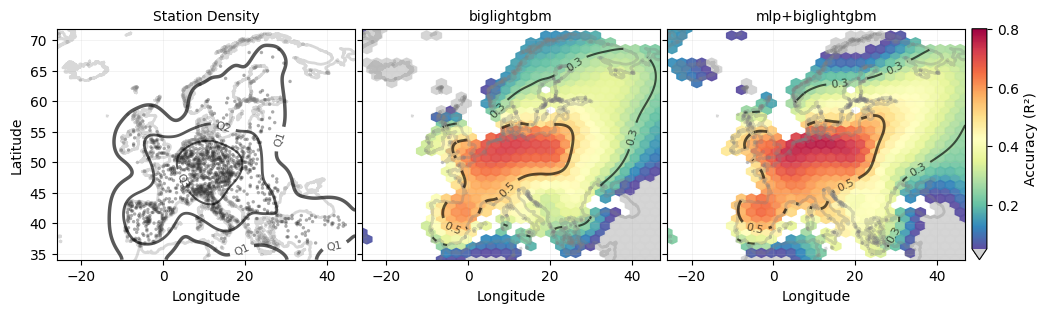

In [4]:
# ============================================================
# Figure 5: Accuracy Surface Visualization
# ============================================================
# Uses local source_code.figure5 module

import pickle as pkl

from source_code.figure5 import (
    calculate_sparsity_map,
    plot_accuracy_sparsity_map,
    make_mask
)

# Load data from local data/ directory
ANALYSIS_DIR = f"{DATA_DIR}/Analysis/validation"

# Load analysis results
with open(f"{ANALYSIS_DIR}/df_analysis.pkl", "rb") as f:
    df_analysis = pkl.load(f)

# Load map boundaries
states = gpd.read_file(f'{DATA_DIR}/ne_10m_land.shp')

# Load training data
df_ozone = pkl.load(open(f'{DATA_DIR}/training/Site_Observation_with_feature.pkl', 'rb'))
df_ozone["time"] = pd.to_datetime(df_ozone["time"])
for col in df_ozone.select_dtypes(include=["float64", "int64"]).columns:
    df_ozone[col] = df_ozone[col].astype("float32")

# Load ozone gridded data for sparsity calculation
ds_ozone = xr.open_dataset(f'{DATA_DIR}/ozone.nc')

# Calculate sparsity map
ds_sparsity = calculate_sparsity_map(
    df_ozone,
    ds_ozone,
    reference_idx=None, 
    radius=500,
    smooth_sigma=10,
    metric="haversine"
)
mask = make_mask(ds_sparsity, states)

# Define model pairs to compare
model_pairs = ['biglightgbm', 'mlp+biglightgbm']

# Generate Figure 5 panels for different sufficiency levels
for sufficiency, resolution in zip([10000, 1000000], [30, 30]):
    for mode, accuracy_range in zip(['average_30x30', 'two_stage'], [(0.1, 0.8), (0.05, 0.8)]):
        df_plot = df_analysis[df_analysis["sufficiency"] == sufficiency]
        
        fig, axes, fitted_models = plot_accuracy_sparsity_map(
            df_analysis=df_plot,
            ds_sparsity=ds_sparsity,
            states=states,
            train_data=df_ozone,
            mask=mask,
            model_list=model_pairs,
            accuracy_range=accuracy_range,
            levels=(0.26, 0.53),
            model_type=mode,
            sufficiency=sufficiency,
            sparsity_bins=7,
            sparsity_levels=[3.0e-06, 3.e-05, 1e-04],
            cmap_name='Spectral_r',
            figsize_per_plot=4,
            height=3,
            splitby="grid",
            resolution=[resolution, resolution],
            full_features=['longitude', 'latitude', 'sufficiency_log', 'sparsity'],
            save_path=f"{FIGURE_DIR}/figure5_{mode}_{sufficiency}.svg"
        )
 


